# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Jonathan Immanuel
- **Email:** jojonathanimmanuel@gmail.com
- **ID Dicoding:** jonathan_andreas

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
<br>Kota-kota apa saja yang memiliki kualitas udara terbaik di China berdasarkan tren data 2013-2017?
- Pertanyaan 2
<br>Kota-kota apa saja yang memiliki kualitas udara terburuk di China berdasarkan tren data 2013-2017?
- Pertanyaan 3
<br>Bagaimana perkembangan kualitas udara di China dari tahun ke tahun berdasarkan data 2013-2017?
- Pertanyaan 4
<br>Kota-kota apa saja yang memiliki peningkatan kualitas udara dari tahun ke tahun berdasarkan data 2013-2017?
- Pertanyaan 5
<br>Fitur-fitur geografi apa saja yang berkaitan dengan kualitas udara di China?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Wrangling

### Mengumpulkan Data

##### Impor Data dari CSV Kota-Kota Cina
Menggunakan library pandas untuk mengimpor data dari file csv yang berisi data kualitas udara di kota-kota Cina dari tahun 2013-2017.

In [2]:
aotizhongxin = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
dingling = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

# Review data
aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


##### Gabungkan Data
Datanya terpisah ke dalam beberapa CSV. Kita harus menggabungkannya menjadi satu data utama.
Untungnya, semua data memiliki format yang sama, sehingga kita dapat menggabungkannya dengan mudah.

In [3]:
data = pd.concat(
    [
        aotizhongxin,
        changping,
        dingling,
        dongsi,
        guanyuan,
        gucheng,
        huairou,
        nongzhanguan,
        shunyi,
        tiantan,
        wanliu,
        wanshouxigong,
    ]
).reset_index(drop=True)

data.drop(["No"], axis=1, inplace=True)

# Read the data
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

Dalam tahap ini, kita akan melihat-lihat data kita dan mencari tahu apakah ada masalah dengan data kita.
Dimulai dari:
- Melihat tipe data dari setiap kolom
- Melihat apakah ada nilai yang hilang
- Melihat apakah ada nilai yang duplikat
- Melihat apakah ada nilai yang tidak masuk akal

##### Melihat tipe data dari setiap kolom

In [4]:
# Cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


Terlihat bahwa data "year", "month", "day", dan "hour" memiliki tipe data integer. Kita akan mengubahnya menjadi tipe data datetime dengan format "YYYY-MM-DD HH:MM:SS" untuk memudahkan analisis data.

##### Melihat apakah ada nilai yang hilang

In [5]:
# Cek missing value
data.isnull().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Terlihat bahwa data memiliki missing values pada kolom "PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "wd", dan "WSPM".

Nilai-nilai integer dan float yang hilang pada kolom "PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", dan "WSPM" akan diisi dengan nilai interpolasi dari nilai sebelumnya dan sesudahnya berdasarkan waktu.

wd itu arah angin, sehingga tidak bisa diisi dengan nilai rata-rata. Kita bisa mengisi missing values dengan nilai yang mirip dengan nilai sebelumnya atau sesudahnya berdasarkan waktu.

##### Melihat apakah ada nilai yang duplikat

In [6]:
# Cek data duplikat
data.duplicated().sum()

0

Tak ada nilai yang duplikat.

##### Melihat apakah ada nilai yang tidak masuk akal
Kita bisa cek apakah ada nilai yang tidak masuk akal dengan melihat nilai maksimum dan minimum dari setiap kolom.

In [7]:
# Cek statistik data
data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Nilai maksimum dari PM2.5, PM10, SO2, NO2, CO, dan O3 tidak masuk akal. Nilai minimumnya sangat kecil dengan standar deviasi yang kecil dibandingkan dengan nilai maksimumnya. Nilai rata-ratanya pun lebih kecil dibandingkan maksimumnya. Kita cek jika dari box plotnya, kolom-kolom tersebut memiliki banyak outliers.

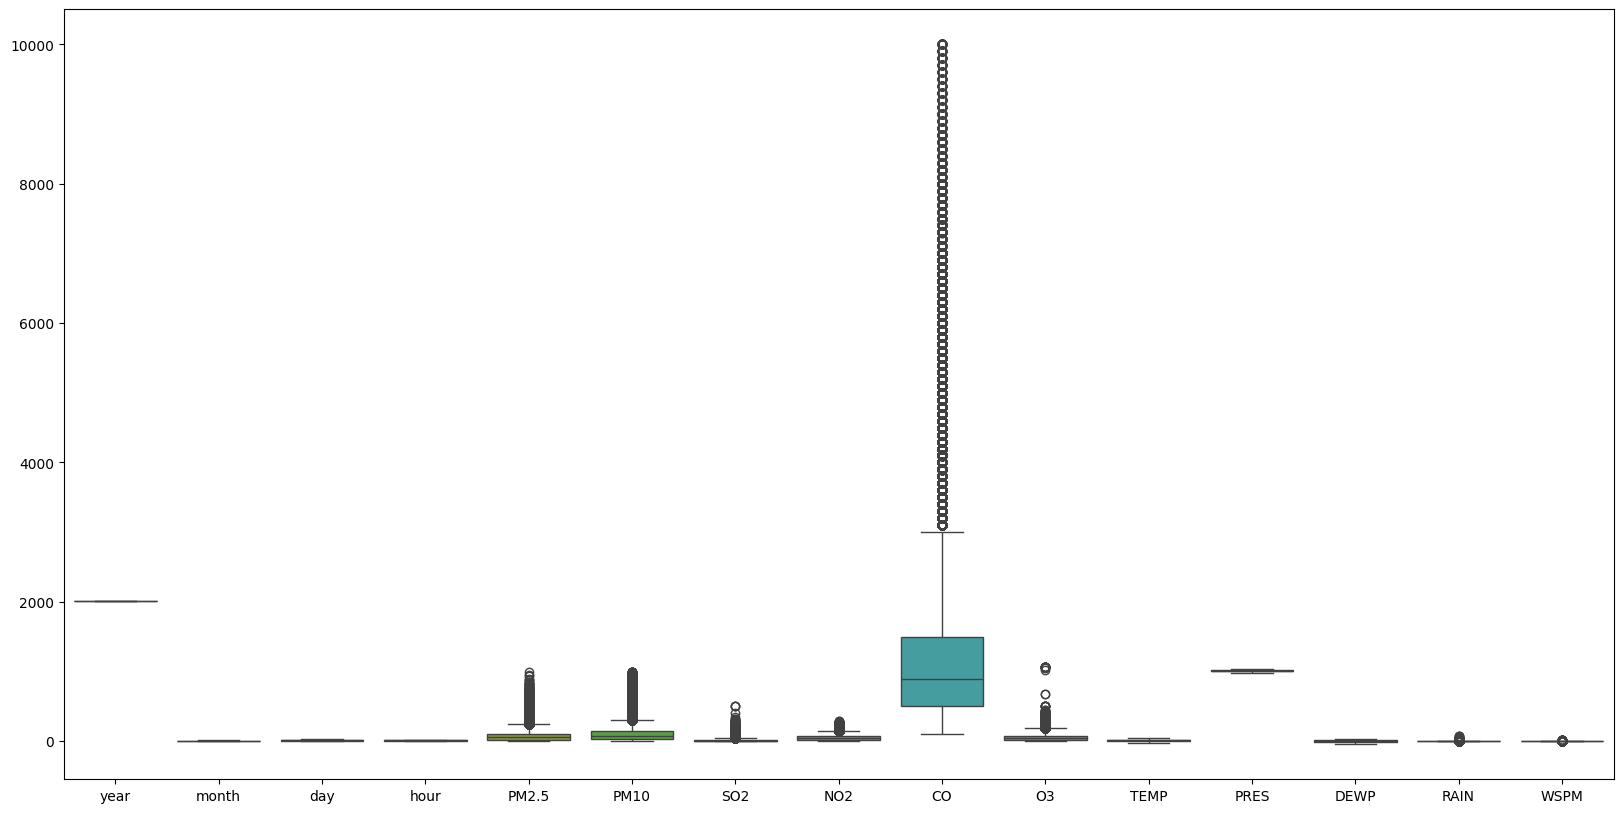

In [8]:
# Cek data mana yang outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.show()

Ternyata, kolom-kolom PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outliers. Kita akan menggantikan nilai outliers dengan nilai interpolasi dari nilai sebelumnya dan sesudahnya berdasarkan waktu.

### Cleaning Data

##### Mengubah Tipe Data

In [9]:
# Ubah kolom datetime ke tipe datetime
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Drop kolom-kolom yang tidak diperlukan
data.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

# Pindah datetime ke awal
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420768 non-null  datetime64[ns]
 1   PM2.5     412029 non-null  float64       
 2   PM10      414319 non-null  float64       
 3   SO2       411747 non-null  float64       
 4   NO2       408652 non-null  float64       
 5   CO        400067 non-null  float64       
 6   O3        407491 non-null  float64       
 7   TEMP      420370 non-null  float64       
 8   PRES      420375 non-null  float64       
 9   DEWP      420365 non-null  float64       
 10  RAIN      420378 non-null  float64       
 11  wd        418946 non-null  object        
 12  WSPM      420450 non-null  float64       
 13  station   420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 44.9+ MB


In [10]:
# Cek jika data dikonversi dengan baik
print(data.head())
print(data.tail())

             datetime  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0 2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
1 2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2 2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
3 2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
4 2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   

   DEWP  RAIN   wd  WSPM       station  
0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1 -18.2   0.0    N   4.7  Aotizhongxin  
2 -18.2   0.0  NNW   5.6  Aotizhongxin  
3 -19.4   0.0   NW   3.1  Aotizhongxin  
4 -19.5   0.0    N   2.0  Aotizhongxin  
                  datetime  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
420763 2017-02-28 19:00:00   11.0  32.0  3.0  24.0  400.0  72.0  12.5  1013.5   
420764 2017-02-28 20:00:00   13.0  32.0  3.0  41.0  500.0  50.0  11.6  1013.6   
420765 2017-02-28 21:00:00   14.0  28.0  4.0  38

Tipe data dari kolom-kolomnya telah diubah menjadi tipe data datetime dengan format "YYYY-MM-DD HH:MM:SS".

##### Mengisi Missing Values
Kita isi missing values dengan nilai interpolasi dari nilai sebelumnya dan sesudahnya berdasarkan waktu.

In [11]:
# Interpolasi data yang hilang
data = data.interpolate()

# Cek jika data sudah diinterpolasi
data.isnull().sum()

C:\Users\Jojo\AppData\Local\Temp\ipykernel_7052\1418842939.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate()


datetime       0
PM2.5          0
PM10           0
SO2            0
NO2            0
CO             0
O3             0
TEMP           0
PRES           0
DEWP           0
RAIN           0
wd          1822
WSPM           0
station        0
dtype: int64

Untuk kolom "wd", kita isi missing values dengan nilai yang mirip dengan nilai sebelumnya atau sesudahnya berdasarkan waktu.

In [12]:
# Ganti kolom wd dengan data sebelumnya
data['wd'] = data['wd'].fillna(method='ffill')
data.isnull().sum()

C:\Users\Jojo\AppData\Local\Temp\ipykernel_7052\2605553802.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['wd'] = data['wd'].fillna(method='ffill')


datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

Nilai-nilai yang hilang pada kolom "PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", dan "WSPM" telah diisi dengan nilai interpolasi dari nilai sebelumnya dan sesudahnya berdasarkan waktu.

##### Mengganti Nilai Outliers
Kita ganti nilai outliers dengan nilai interpolasi dari nilai sebelumnya dan sesudahnya berdasarkan waktu.

In [13]:
# Interpolasi data outliers selain kolom wd dan station dengan iqr
def replace_with_interpolation(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    # Identify outliers
    outliers = (data < lower) | (data > upper)

    # Replace outliers with NaN
    data[outliers] = np.nan

    # Interpolate NaN values
    data.interpolate(method='linear', inplace=True, limit_direction='both')

    return data

# Terapkan fungsi replace_with_interpolation
data_wd_station = data[['wd', 'station']]
data = replace_with_interpolation(data.drop(['wd', 'station'], axis=1))

# Tambahkan kembali kolom wd dan station
data = pd.concat([data, data_wd_station], axis=1)

# Normalisasi data CO yang tinggi
data['CO'] = data['CO'] / 10

# Normalisasi data PRES yang tinggi
data['PRES'] = data['PRES'] / 10

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420768 non-null  datetime64[ns]
 1   PM2.5     420768 non-null  float64       
 2   PM10      420768 non-null  float64       
 3   SO2       420768 non-null  float64       
 4   NO2       420768 non-null  float64       
 5   CO        420768 non-null  float64       
 6   O3        420768 non-null  float64       
 7   TEMP      420768 non-null  float64       
 8   PRES      420768 non-null  float64       
 9   DEWP      420768 non-null  float64       
 10  RAIN      420768 non-null  float64       
 11  WSPM      420768 non-null  float64       
 12  wd        420768 non-null  object        
 13  station   420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 44.9+ MB


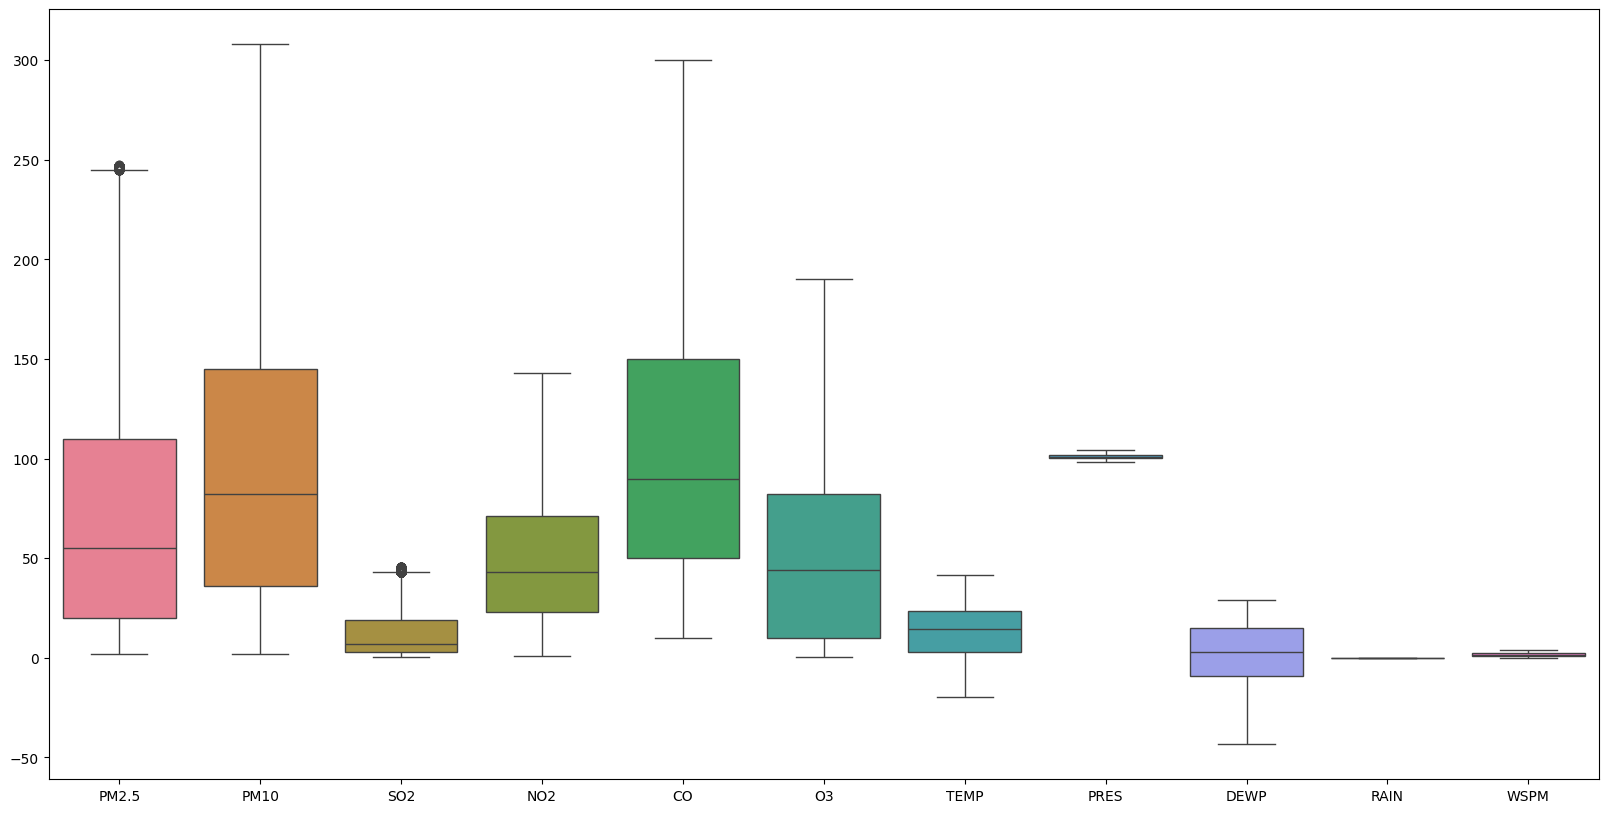

In [14]:
# Cek jika data sudah diinterpolasi
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.show()

In [15]:
# Cek data lagi
data.describe(include='all')

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
count,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.0,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43653,35064
mean,2015-03-01 11:30:00.000001024,74.221800,99.562204,12.825108,49.935493,109.492252,54.735403,13.531692,101.075334,2.482421,0.0,1.614980,NaN,NaN
min,2013-03-01 00:00:00,2.000000,2.000000,0.285600,1.026500,10.000000,0.214200,-19.900000,98.240000,-43.400000,0.0,0.000000,NaN,NaN
25%,2014-03-01 05:45:00,20.000000,36.000000,3.000000,23.000000,50.000000,10.000000,3.100000,100.230000,-8.900000,0.0,0.900000,NaN,NaN
50%,2015-03-01 11:30:00,55.000000,82.000000,7.000000,43.000000,90.000000,44.000000,14.500000,101.040000,3.000000,0.0,1.400000,NaN,NaN
75%,2016-02-29 17:15:00,110.000000,145.000000,19.000000,71.000000,150.000000,82.000000,23.300000,101.900000,15.100000,0.0,2.200000,NaN,NaN
max,2017-02-28 23:00:00,247.500000,308.000000,45.500000,143.000000,300.000000,190.000000,41.600000,104.280000,29.100000,0.0,4.100000,NaN,NaN


In [16]:
data.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,30.0,77.0,-0.7,102.30,-18.8,0.0,3.1,NNW,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,30.0,77.0,-1.1,102.32,-18.2,0.0,3.1,N,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,30.0,73.0,-1.1,102.35,-18.2,0.0,3.1,NNW,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,30.0,72.0,-1.4,102.45,-19.4,0.0,3.1,NW,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,30.0,72.0,-2.0,102.52,-19.5,0.0,2.0,N,Aotizhongxin


## Exploratory Data Analysis (EDA)

### Explore Air Quality in China by Cities from 2013-2017

Rata-rata nilai PM2.5, PM10, SO2, NO2, dan CO yang rendah menunjukkan kualitas udara yang baik.
O3 yang tinggi juga menunjukkan kualitas udara yang baik.

Maka, kita bisa kalkulasi kualitas udara dengan rumus:
- Kualitas Udara Buruk = (PM2.5 + PM10 + SO2 + NO2 + CO - O3) / 6 untuk normalisasi nilai

In [17]:
# Membuat tren kualitas udara per kota
air_quality_station = data.groupby('station').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

# Tambahkan kolom kualitas udara buruk
# Semakin kecil nilai bad_air_quality, maka semakin baik kualitas udaranya
air_quality_station['bad_air_quality'] = (air_quality_station['PM2.5'] + air_quality_station['PM10'] + air_quality_station['SO2'] + air_quality_station['NO2'] + air_quality_station['CO'] - air_quality_station['O3']) / 6

# Urutkan data dari kualitas udara terbaik
air_quality_station.sort_values('bad_air_quality', ascending=True, inplace=True)

# Drop kolom-kolom yang tidak diperlukan
air_quality_station.drop(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], axis=1, inplace=True)

# Reset index
air_quality_station.reset_index(drop=True, inplace=True)

air_quality_station

,station,bad_air_quality
0,Dingling,33.783342
1,Huairou,39.285677
2,Changping,43.700489
3,Shunyi,46.313656
4,Tiantan,50.755344
5,Aotizhongxin,51.550976
6,Nongzhanguan,51.859150
7,Guanyuan,51.905366
8,Dongsi,52.369247
9,Wanshouxigong,52.866835


In [18]:
# Tampilkan 5 kota dengan kualitas udara terbaik
air_quality_station.head()

,station,bad_air_quality
0,Dingling,33.783342
1,Huairou,39.285677
2,Changping,43.700489
3,Shunyi,46.313656
4,Tiantan,50.755344


In [19]:
# Tampilkan 5 kota dengan kualitas udara terburuk
air_quality_station.tail().sort_values('bad_air_quality', ascending=False)

,station,bad_air_quality
11,Wanliu,54.973553
10,Gucheng,53.239273
9,Wanshouxigong,52.866835
8,Dongsi,52.369247
7,Guanyuan,51.905366


### Explore Air Quality Trend in China
Kita lihat perkembangan kualitas udara di China dari tahun ke tahun.

In [20]:
# Perkembangan kualitas udara di China dari tahun 2013-2017 (kolom PM2.5, PM10, SO2, NO2, CO, dan O3)
# Karena data yang ada sangat banyak, kita akan mengambil data rata-rata per bulan
average_air_quality = data.groupby('datetime').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

# Buat kolom kualitas udara buruk
# Semakin kecil nilai bad_air_quality_station, maka semakin baik kualitas udaranya
average_air_quality['bad_air_quality'] = (average_air_quality['PM2.5'] + average_air_quality['PM10'] + average_air_quality['SO2'] + average_air_quality['NO2'] + average_air_quality['CO'] - average_air_quality['O3']) / 6

# Ubah tipe data datetime dan karena datanya banyak, kita akan mengambil data rata-rata per bulan
average_air_quality = average_air_quality.resample('M', on='datetime').mean().reset_index()
average_air_quality['datetime'] = average_air_quality['datetime'].astype('datetime64[ns]').dt.strftime('%Y-%m')

# Buang data yang tidak diperlukan
average_air_quality.drop(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], axis=1, inplace=True)

average_air_quality.head(10)

,datetime,bad_air_quality
0,2013-03,63.514436
1,2013-04,41.305546
2,2013-05,49.800725
3,2013-06,54.921713
4,2013-07,35.423747
5,2013-08,32.810002
6,2013-09,49.764211
7,2013-10,60.423433
8,2013-11,57.927355
9,2013-12,60.611605


### Explore Cities Air Quality Trend in China

Kita ubah tren banyak kolom per kota menjadi satu kolom "trend" yang berisi nilai rata-rata dari kolom-kolom kualitas udara.

In [21]:
# Trend per kota
# Karena data yang ada sangat banyak, kita akan mengambil data rata-rata per bulan serta menggabungkan data menjadi satu kolom "trend"
average_air_quality_station = data.groupby(['station', 'datetime']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

# Buat kolom kualitas udara buruk
# Semakin kecil nilai bad_air_quality_station, maka semakin baik kualitas udaranya
average_air_quality_station['bad_air_quality'] = (average_air_quality_station['PM2.5'] + average_air_quality_station['PM10'] + average_air_quality_station['SO2'] + average_air_quality_station['NO2'] + average_air_quality_station['CO'] - average_air_quality_station['O3']) / 6

# Buang data yang tidak diperlukan
average_air_quality_station.drop(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], axis=1, inplace=True)

# Dapatkan rata-rata kualitas udara per bulan
average_air_quality_station = average_air_quality_station.groupby(['station']).resample('M', on='datetime').mean().reset_index()
average_air_quality_station['datetime'] = average_air_quality_station['datetime'].astype('datetime64[ns]').dt.strftime('%Y-%m')

# Perlihat data
average_air_quality_station.head(10)

,station,datetime,bad_air_quality
0,Aotizhongxin,2013-03,70.340602
1,Aotizhongxin,2013-04,47.521845
2,Aotizhongxin,2013-05,54.621453
3,Aotizhongxin,2013-06,61.919837
4,Aotizhongxin,2013-07,38.713147
5,Aotizhongxin,2013-08,36.995980
6,Aotizhongxin,2013-09,54.715691
7,Aotizhongxin,2013-10,63.936755
8,Aotizhongxin,2013-11,62.656000
9,Aotizhongxin,2013-12,63.256811


In [22]:
average_air_quality_station.tail(10)

,station,datetime,bad_air_quality
566,Wanshouxigong,2016-05,29.008065
567,Wanshouxigong,2016-06,26.244362
568,Wanshouxigong,2016-07,34.308356
569,Wanshouxigong,2016-08,29.489695
570,Wanshouxigong,2016-09,35.402662
571,Wanshouxigong,2016-10,57.557432
572,Wanshouxigong,2016-11,76.429745
573,Wanshouxigong,2016-12,84.868688
574,Wanshouxigong,2017-01,67.065900
575,Wanshouxigong,2017-02,47.680928


### Explore Geoanalysis of Air Quality in China

Kita lihat fitur-fitur geografi yang berkaitan dengan kualitas udara, yaitu:
- WSPM: kecepatan angin
- TEMP: suhu
- PRES: tekanan udara
- DEWP: titik embun

In [23]:
# Buat data geoanalisis
geoanalysis_data = data.groupby(['station', 'datetime']).agg({
    'WSPM' : 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
}).reset_index()

# Ratakan data menjadi per bulan
geoanalysis_data = geoanalysis_data.groupby(['station']).resample('M', on='datetime').mean().reset_index()
geoanalysis_data['datetime'] = geoanalysis_data['datetime'].astype('datetime64[ns]').dt.strftime('%Y-%m')

# Gabungkan data geoanalysis dengan data kualitas udara per kota
geoanalysis_air_quality = geoanalysis_data.merge(average_air_quality_station, on=['station', 'datetime'], how='left')

# Perlihat data
geoanalysis_air_quality.head(10)

,station,datetime,WSPM,TEMP,PRES,DEWP,bad_air_quality
0,Aotizhongxin,2013-03,1.866398,6.053629,101.254745,-5.729435,70.340602
1,Aotizhongxin,2013-04,1.985764,12.260694,100.829694,-1.553611,47.521845
2,Aotizhongxin,2013-05,1.652487,21.374194,100.316223,9.790457,54.621453
3,Aotizhongxin,2013-06,1.235486,23.386111,100.016556,18.009028,61.919837
4,Aotizhongxin,2013-07,1.264315,26.877419,99.603306,21.459946,38.713147
5,Aotizhongxin,2013-08,1.287634,26.744355,99.931680,20.470430,36.995980
6,Aotizhongxin,2013-09,1.134028,20.077778,100.935514,14.783889,54.715691
7,Aotizhongxin,2013-10,1.141263,12.809812,101.626895,5.981855,63.936755
8,Aotizhongxin,2013-11,1.516528,5.530972,101.697208,-6.101111,62.656000
9,Aotizhongxin,2013-12,1.515121,-0.161290,101.995000,-12.480780,63.256811


In [24]:
geoanalysis_air_quality.tail(10)

,station,datetime,WSPM,TEMP,PRES,DEWP,bad_air_quality
566,Wanshouxigong,2016-05,2.103360,21.672849,100.554140,6.201882,29.008065
567,Wanshouxigong,2016-06,1.794306,25.735833,100.076194,14.683472,26.244362
568,Wanshouxigong,2016-07,1.668414,27.699462,100.063535,20.727285,34.308356
569,Wanshouxigong,2016-08,1.604301,27.863306,100.359005,19.286828,29.489695
570,Wanshouxigong,2016-09,1.502014,22.219115,100.933264,14.062639,35.402662
571,Wanshouxigong,2016-10,1.442675,13.338648,101.712669,7.278091,57.557432
572,Wanshouxigong,2016-11,1.497917,4.414028,102.056694,-3.758472,76.429745
573,Wanshouxigong,2016-12,1.385820,0.640726,102.346613,-9.272446,84.868688
574,Wanshouxigong,2017-01,1.797446,-1.138740,102.505040,-12.780780,67.065900
575,Wanshouxigong,2017-02,1.849182,2.661533,102.202059,-13.627679,47.680928


## Visualization & Explanatory Analysis

### Pertanyaan 1 dan 2: Kota-kota apa saja yang memiliki kualitas udara terbaik dan terburuk di China berdasarkan tren data 2013-2017?

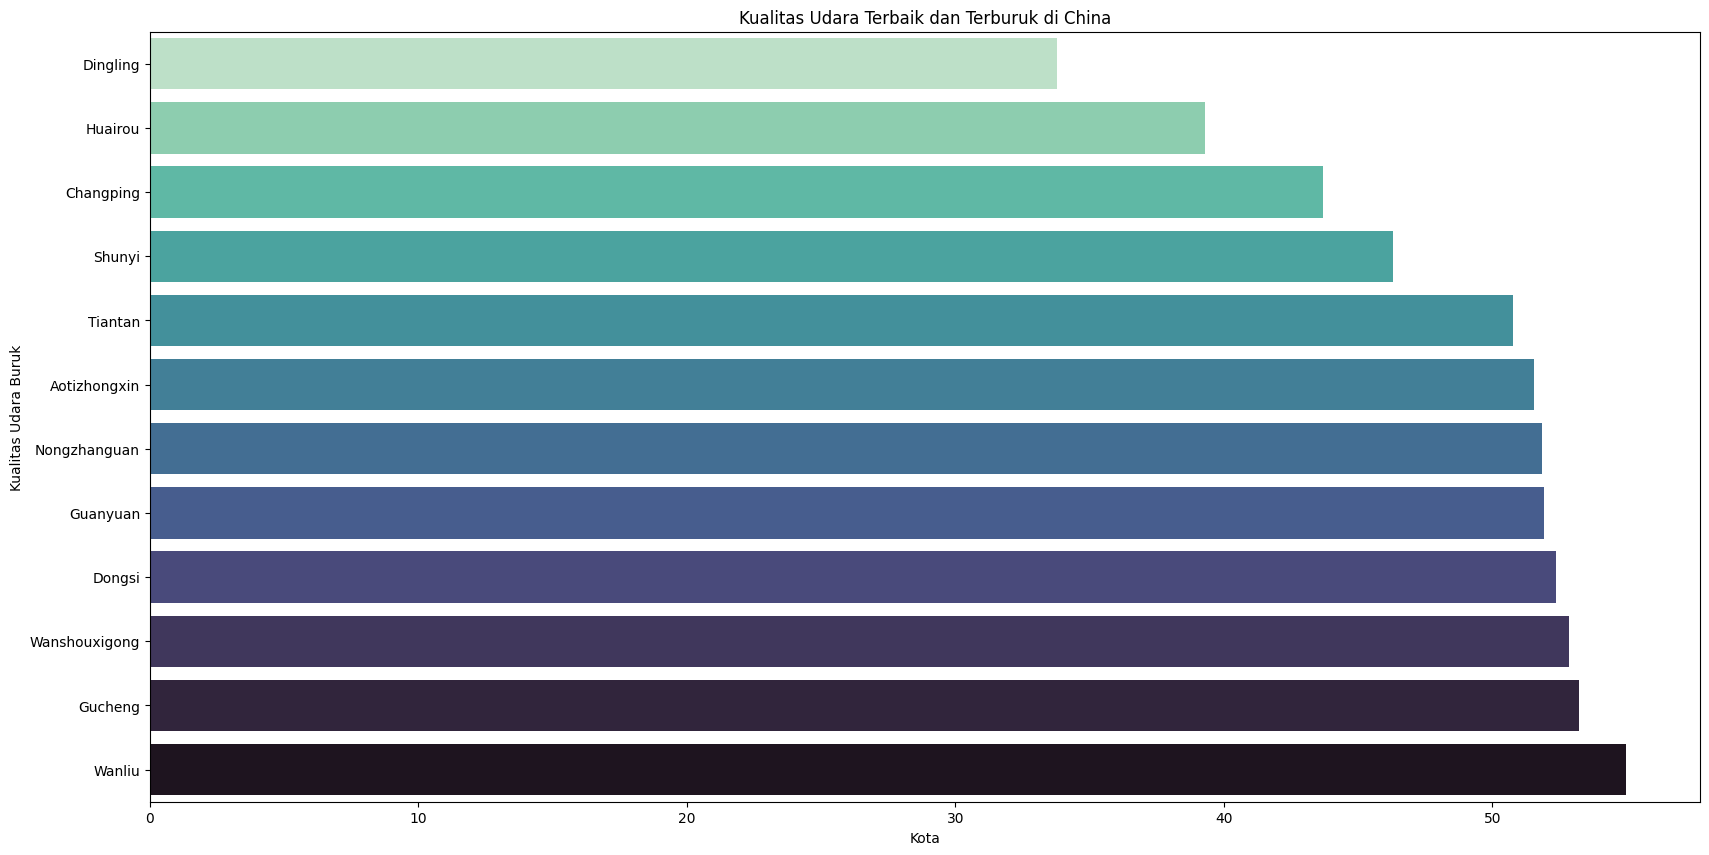

In [25]:
# Buat barchart untuk menunjukkan kualitas udara terbaik dan terburuk
plt.figure(figsize=(20, 10))
sns.barplot(x='bad_air_quality', y='station', data=air_quality_station, palette='mako_r', hue='station', orient='h')
plt.title('Kualitas Udara Terbaik dan Terburuk di China')
plt.xlabel('Kota')
plt.ylabel('Kualitas Udara Buruk')

plt.show()

Terlihat bahwa kota-kota yang memiliki kualitas udara terbaik adalah:
- Dingling
- Huairou
- Changping

Kota-kota yang memiliki kualitas udara terburuk adalah:
- Wanliu
- Gucheng
- Wanshouxigong

### Pertanyaan 3: Bagaimana perkembangan kualitas udara di China dari tahun ke tahun berdasarkan data 2013-2017?

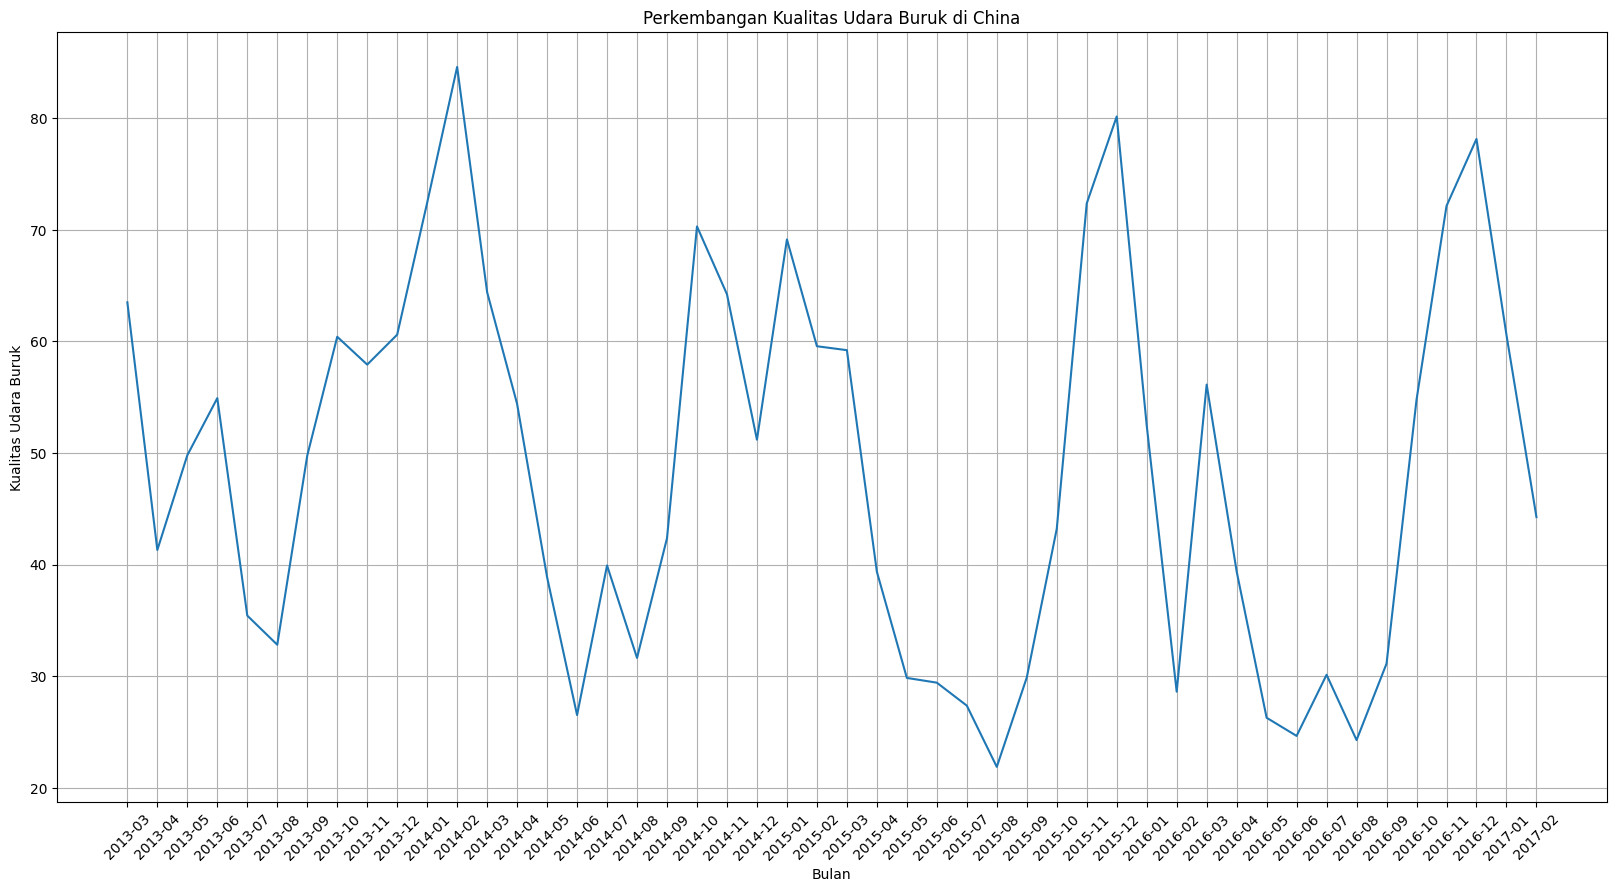

In [31]:
# Buat linechart untuk menunjukkan perkembangan kualitas udara di China
plt.figure(figsize=(20, 10))
sns.lineplot(x='datetime', y='bad_air_quality', data=average_air_quality)
plt.title('Perkembangan Kualitas Udara Buruk di China')
plt.xlabel('Bulan')
plt.ylabel('Kualitas Udara Buruk')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Pada linechart, kita bisa melihat bulan-bulan yang memiliki kualitas udara terbaik dan terburuk di China dari tahun ke tahun.
Dilihat bahwa secara konsisten per tahun, kualitas udara di China memburuk dari bulan Agustus hingga bulan Maret. Alasannya adalah banyak orang yang memakai alat pemanas yang menghasilkan polusi udara di musim dingin.

### Pertanyaan 4: Kota-kota apa saja yang memiliki peningkatan kualitas udara dari tahun ke tahun berdasarkan data 2013-2017?

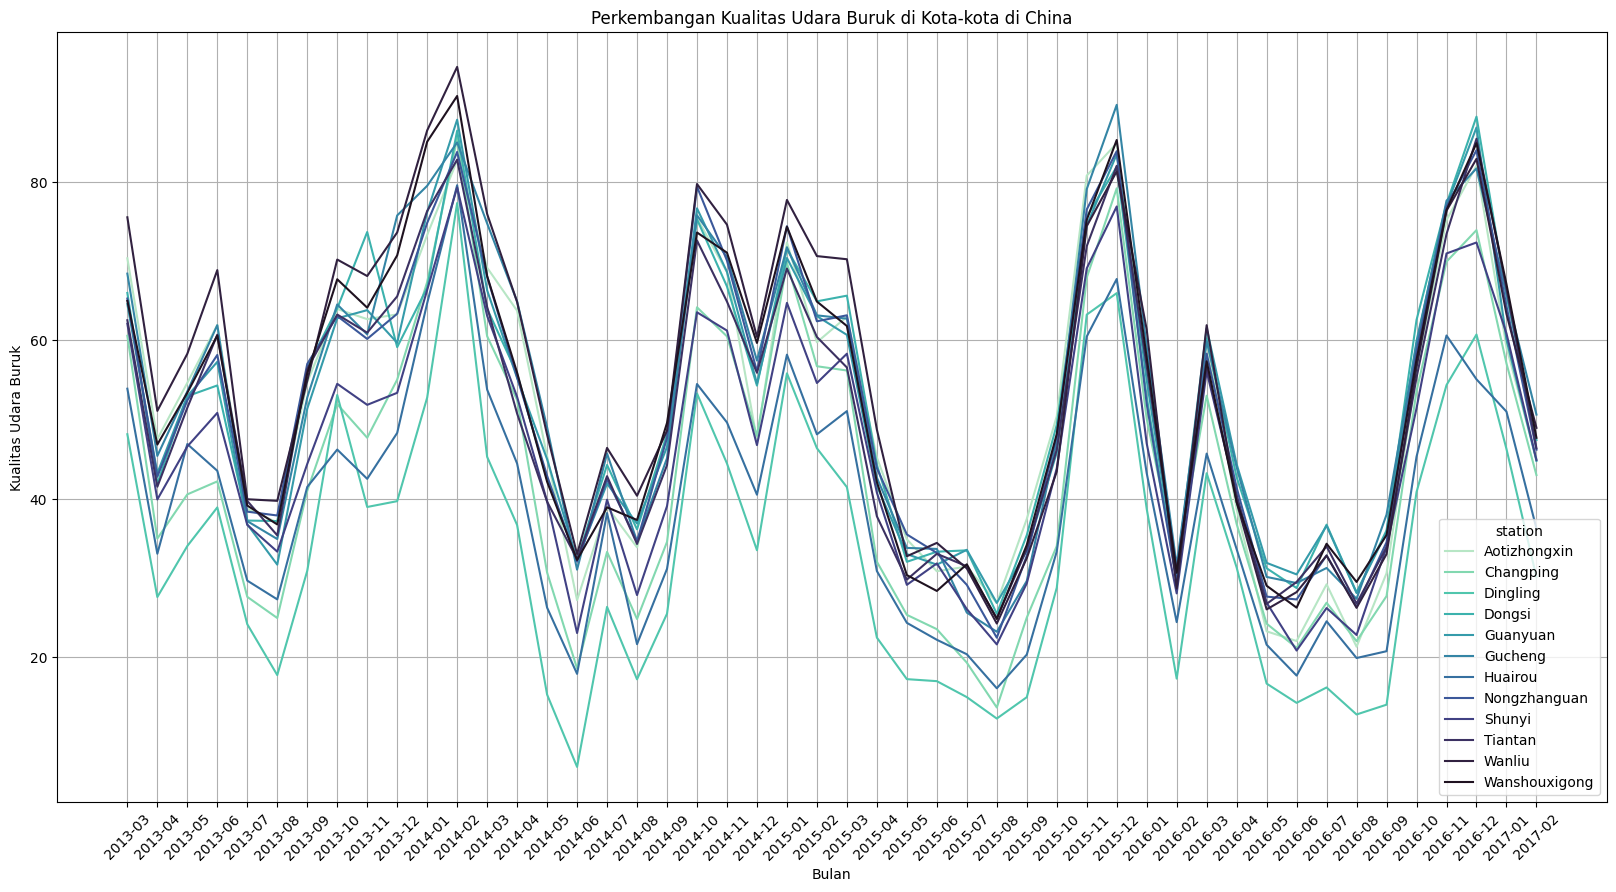

In [32]:
# Buat linechart untuk menunjukkan perkembangan kualitas udara di kota-kota di China
plt.figure(figsize=(20, 10))
sns.lineplot(x='datetime', y='bad_air_quality', data=average_air_quality_station, hue='station', palette='mako_r')
plt.title('Perkembangan Kualitas Udara Buruk di Kota-kota di China')
plt.xlabel('Bulan')
plt.ylabel('Kualitas Udara Buruk')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Seluruh kota di China mengalami tren kualitas udara yang sama dengan pertanyaan 3, yaitu memburuk dari bulan Agustus hingga bulan Maret. Alasannya adalah banyak orang yang memakai alat pemanas yang menghasilkan polusi udara di musim dingin.

### Pertanyaan 5: Fitur-fitur geografi apa yang berkaitan dengan kualitas udara di China berdasarkan data 2013-2017?

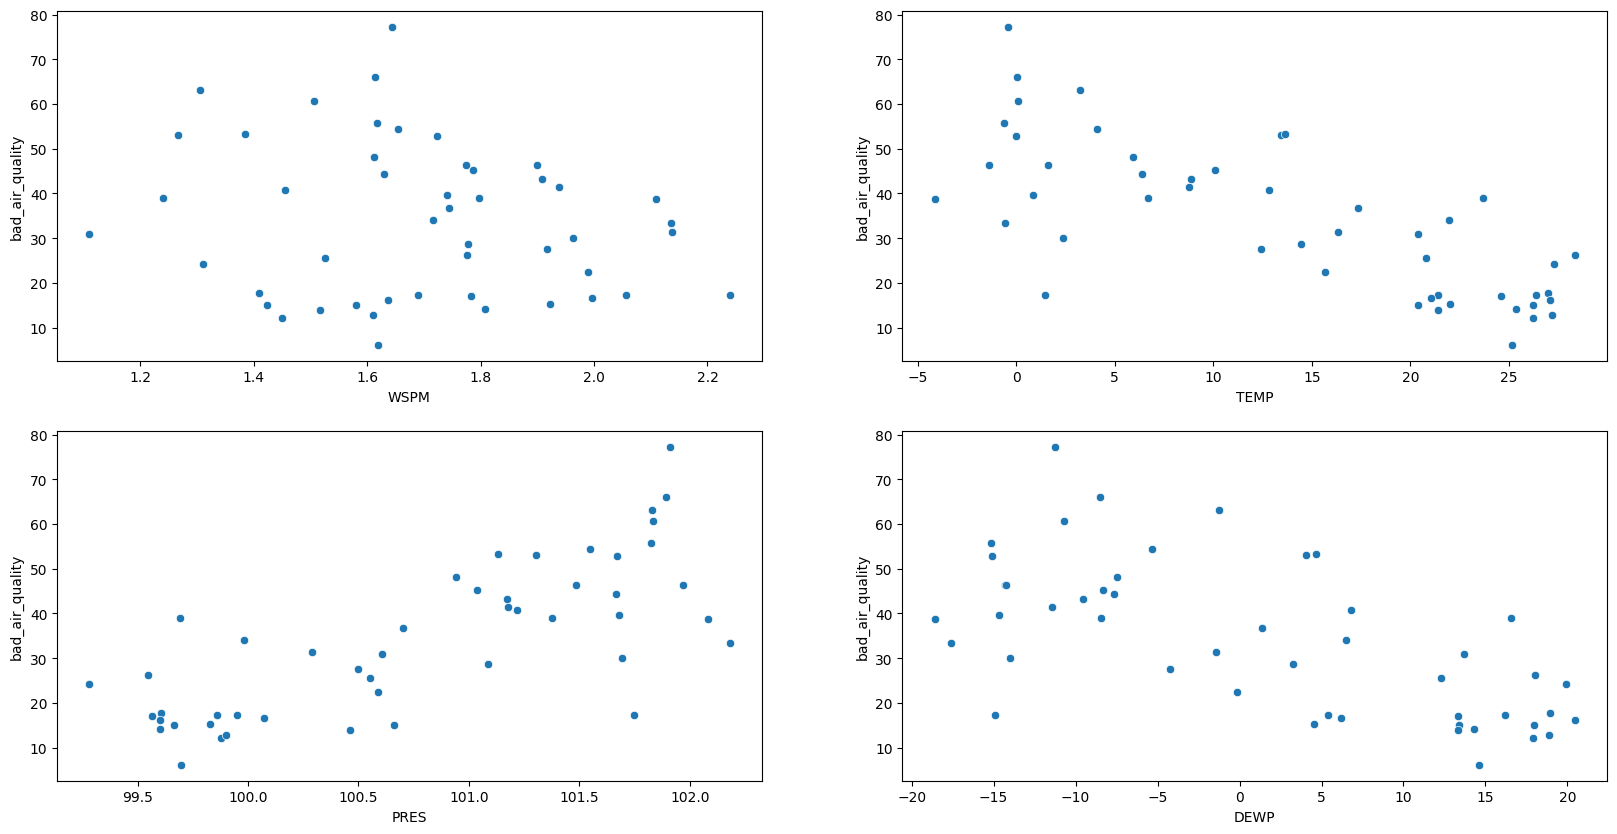

In [41]:
# Buat scatterplot untuk menunjukkan hubungan antara kualitas udara dengan kecepatan angin, suhu, tekanan udara, dan titik embun di salah satu kota China
# Kita memilih kota Dingling karena setiap kota memiliki tren yang sama
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.scatterplot(x='WSPM', y='bad_air_quality', data=geoanalysis_air_quality[geoanalysis_air_quality['station'] == 'Dingling'], ax=ax[0][0])
sns.scatterplot(x='TEMP', y='bad_air_quality', data=geoanalysis_air_quality[geoanalysis_air_quality['station'] == 'Dingling'], ax=ax[0][1])
sns.scatterplot(x='PRES', y='bad_air_quality', data=geoanalysis_air_quality[geoanalysis_air_quality['station'] == 'Dingling'], ax=ax[1][0])
sns.scatterplot(x='DEWP', y='bad_air_quality', data=geoanalysis_air_quality[geoanalysis_air_quality['station'] == 'Dingling'], ax=ax[1][1])
plt.show()


In [40]:
# Cek korelasi antara kualitas udara dengan kecepatan angin, suhu, tekanan udara, dan titik embun di salah satu kota China
# Kita memilih kota Dingling karena setiap kota memiliki tren yang sama
numeric_data = geoanalysis_air_quality[geoanalysis_air_quality['station'] == 'Dingling'][['bad_air_quality', 'WSPM', 'TEMP', 'PRES', 'DEWP']]
corr = numeric_data.corr()
corr

,bad_air_quality,WSPM,TEMP,PRES,DEWP
bad_air_quality,1.000000,-0.174044,-0.753882,0.746270,-0.643928
WSPM,-0.174044,1.000000,-0.292719,0.178988,-0.504595
TEMP,-0.753882,-0.292719,1.000000,-0.960974,0.954699
PRES,0.746270,0.178988,-0.960974,1.000000,-0.884191
DEWP,-0.643928,-0.504595,0.954699,-0.884191,1.000000


Dapat dilihat bahwa fitur geografi yang berkaitan dengan kualitas udara di China adalah:
- TEMP: suhu
- PRES: tekanan udara
- DEWP: titik embun

Menariknya, semakin tinggi suhu, semakin tinggi kualitas udara. Artinya, banyak orang lebih sedikit menggunakan alat pemanas yang menghasilkan polusi udara di musim dingin.

Lalu semakin tinggi tekanan udara dan semakin rendah suhu udara, semakin rendah kualitas udara. Artinya, seiring dengan musim dingin, tekanan udara semakin tinggi dan suhu udara semakin rendah, sehingga kualitas udara semakin buruk.

## Conclusion

- Conclusion pertanyaan 1 dan 2
<br><br>Kota-kota di China dengan kualitas udara terbaik adalah Dingling, Huairou, dan Changping. Sementara itu, kota-kota dengan kualitas udara terburuk adalah Wanliu, Gucheng, dan Wanshouxigong.

- Conclusion pertanyaan 3
<br><br>Secara konsisten setiap tahun, kualitas udara di China cenderung memburuk dari bulan Agustus hingga Maret. Hal ini mungkin disebabkan oleh peningkatan penggunaan alat pemanas yang menghasilkan polusi udara selama musim dingin.

- Conclusion pertanyaan 4
<br><br>Seluruh kota di China mengikuti tren yang sama seperti yang dijelaskan dalam Kesimpulan Pertanyaan 3, yaitu kualitas udara memburuk dari bulan Agustus hingga Maret. Hal ini juga mungkin disebabkan oleh peningkatan penggunaan alat pemanas yang menghasilkan polusi udara selama musim dingin.

- Conclusion pertanyaan 5
<br><br>Ada hubungan positif antara suhu dan kualitas udara. Dengan kata lain, semakin tinggi suhu, semakin baik kualitas udaranya. Ini mungkin disebabkan oleh penggunaan alat pemanas yang lebih sedikit selama musim panas, yang menghasilkan polusi udara yang lebih rendah.
<br><br>Selain itu, ada hubungan negatif antara tekanan udara dan kualitas udara, serta antara suhu dan kualitas udara. Artinya, semakin tinggi tekanan udara dan semakin rendah suhu, semakin buruk kualitas udaranya. Ini mungkin menunjukkan bahwa selama musim dingin, ketika tekanan udara cenderung lebih tinggi dan suhu lebih rendah, kualitas udara cenderung memburuk.

In [ ]:
# Simpan data utama
data.to_csv('./dashboard/data.csv', index=False)